# Machine Learning Foundations Homework 3

**Question 1**

Question 1-2 are about linear regression.

Consider a noisy target $y=\mathbf{w}_{f}^\top \mathbf{x}+\epsilon$, where $\mathbf{x} \in \mathbb{R}^{d}$ (with the added coordinate $x_0 = 1$, $y\in \mathbb{R}$, $\mathbf{w}_{f}$ is an unknown vector, and $\epsilon$ is a noise term with zero mean and $\sigma^2$ variance. Assume $\epsilon$ is independent of $\mathbf{x}$ and all other $\epsilon$'s. If linear regression is carried out using a training data set $\mathcal{D}=\left\{\left(\mathbf{x}_{1}, y_{1}\right), \ldots,\left(\mathbf{x}_{N}, y_{N}\right)\right\}$, and outputs the parameter vector $\mathbf{w}_{\text{lin}}$, it can be shown that the expected in-sample error $E_{\text{in}}$ with respect to $\mathcal{D}$ is given by:

$$
\mathbb{E}_{\mathcal{D}}\left[E_{\text {in }}\left(\mathbf{w}_{\text {lin }}\right)\right]=\sigma^{2}\left(1-\frac{d+1}{N}\right)
$$

For $\sigma = 0.1$ and $d=8$, which among the following choices is the smallest number of example $N$ that will result in an expected $E_{\text{in}}$ greater than 0.008?

- 500
- 25
- 100
- 1000
- 10

**Sol:** 

In [1]:
sigma = 0.1
d = 8

expected_E_in = lambda N: sigma**2 * (1 - (d + 1) / N)

In [2]:
for N in [500, 25, 100, 1000, 10]:
    print(f"{N:>4}: {expected_E_in(N)}")


 500: 0.009820000000000002
  25: 0.006400000000000001
 100: 0.009100000000000002
1000: 0.009910000000000002
  10: 0.001


So the answer is $N = 100$.

**Question 2**

Recall that we have introduced the hat matrix $\mathrm{H}=\mathrm{X}\left(\mathrm{X}^\top \mathrm{X}\right)^{-1} \mathrm{X}^\top$ in class, where $\mathbf{X} \in \mathbb{R}^{N \times(d+1)}$ for $N$ examples and $d$ features. Assume $\mathrm{X}^\top \mathrm{X}$ is invertible, which statements of $\mathrm{H}$ are true?

- (a) $\mathrm{H}$ is always positive semi-definite.
- (b) $\mathrm{H}$ is always invertible.
- (c) some eigenvalues of $\mathrm{H}$ are possibly bigger than 1
- (d) $d+1$ eigenvalues of $\mathrm{H}$ are exactly 1.
- (e) $\mathrm{H}^{1126} = \mathrm{H}$

**Sol:**

- (a): true, since the eigenvalues of $\mathrm{H}$ are all non-negative.
- (b): false, since the rank of $\mathrm{H}$ is $d+1$, which may be less than $N$.
- (c): false.
- (d): true.
- (e): true, since $\mathrm{H}$ is an orthogonal projection matrix, project twice does not have much more effect.

**Question 3**

Question 3-5 are about error and SGD

Which of the following is an upper bound of $\left[\operatorname{sign}\left(\mathbf{w}^{T} \mathbf{x}\right) \neq y\right]$ for $y \in \{-1, +1\}$?

- $\operatorname{err}(\mathbf{w})=\left(-y \mathbf{w}^{T} \mathbf{x}\right)$
- $\operatorname{err}(\mathbf{w})=\left(\max \left(0,1-y \mathbf{w}^{T} \mathbf{x}\right)\right)^{2}$
- $\operatorname{err}(\mathbf{w})=\max \left(0,-y \mathbf{w}^{T} \mathbf{x}\right)$
- $\operatorname{err}(\mathbf{w})=\theta\left(-y \mathbf{w}^{T} \mathbf{x}\right)$

**Sol:**

If we draw the picture, than we can find that only the second error function $\operatorname{err}(\mathbf{w})=\left(\max \left(0,1-y \mathbf{w}^{T} \mathbf{x}\right)\right)^{2}$ is an upper bound for the 0-1 error function.

**Question 4**

Which of the following is not a everywhere-differentiable function of $\mathbf{w}$?

- $\operatorname{err}(\mathbf{w})=\left(\max \left(0,1-y \mathbf{w}^{T} \mathbf{x}\right)\right)^{2}$
- $\operatorname{err}(\mathbf{w})=\max \left(0,-y \mathbf{w}^{T} \mathbf{x}\right)$
- $\operatorname{err}(\mathbf{w})=\theta\left(-y \mathbf{w}^{T} \mathbf{x}\right)$
- $\operatorname{err}(\mathbf{w})=\left(-y \mathbf{w}^{T} \mathbf{x}\right)$

**Sol:**

The error function $\operatorname{err}(\mathbf{w})=\max \left(0,-y \mathbf{w}^{T} \mathbf{x}\right)$ is not differentiable at $\mathbf{w}$ where $\mathbf{w}^T\mathbf{x} = 0$.

**Question 5**

When using SGD on the following error functions and 'ignoring' some singular points that are not differentiable, which of the following error function results in PLA?

- $\operatorname{err}(\mathbf{w})=\left(\max \left(0,1-y \mathbf{w}^{T} \mathbf{x}\right)\right)^{2}$
- $\operatorname{err}(\mathbf{w})=\max \left(0,-y \mathbf{w}^{T} \mathbf{x}\right)$
- $\operatorname{err}(\mathbf{w})=\theta\left(-y \mathbf{w}^{T} \mathbf{x}\right)$
- $\operatorname{err}(\mathbf{w})=\left(-y \mathbf{w}^{T} \mathbf{x}\right)$

**Sol:** The answer is $\operatorname{err}(\mathbf{w})=\max \left(0,-y \mathbf{w}^{T} \mathbf{x}\right)$.

At $\mathbf{w}^{T} \mathbf{x} \neq 0 $, this error function is differentiable. 

If $y = -1$, then
$$
\nabla\text{err}(\mathbf{w})=\left\{\begin{array}{ll}
\mathbf{0}, & \mathbf{w}^T\mathbf{x} <0 \\
\mathbf{x}, & \mathbf{w}^T\mathbf{x} >0
\end{array}\right..
$$

If $y = 1$, then

$$
\nabla\text{err}(\mathbf{w})=\left\{\begin{array}{ll}
\mathbf{0}, & \mathbf{w}^T\mathbf{x} >0 \\
\mathbf{-x}, & \mathbf{w}^T\mathbf{x} <0
\end{array}\right..
$$

We can combine the two cases together as 

$$
\nabla\text{err}(\mathbf{w})=\left\{\begin{array}{ll}
\mathbf{0}, & y\mathbf{w}^T\mathbf{x} >0 \\
-y\mathbf{x}, & y\mathbf{w}^T\mathbf{x} <0
\end{array}\right..
$$

While in PLA, we update $\mathbf{w}$ only at a misclassified point, i.e., $y \mathbf{w}^T\mathbf{x} < 0$, and the update value is exactly $y \mathbf{x}$, which is the opposite direction of its gradient.

**Question 6**

For Question 6-10, you will play with gradient descent algorithm and variants. Consider a function

$$E(u, v)=e^{u}+e^{2 v}+e^{u v}+u^{2}-2 u v+2 v^{2}-3 u-2 v.
$$

What is the gradient $\nabla E(u, v)$ around $(u, v)=(0,0)$?

**Sol:**

The gradient of $E(u, v)$ is 

$$
\nabla E(u, v) = \left[\begin{array}{l}
\frac{\partial E}{\partial u} \\
\frac{\partial E}{\partial v}
\end{array}\right] = \left[\begin{array}{l}
e^{u}+v e^{u v}+2 u-2 v-3 \\
2 e^{2 v}+u e^{u v}-2 u+4 v-2
\end{array}\right].
$$

So $\nabla E(0, 0) = \begin{bmatrix} -2 \\ 0 \end{bmatrix} $.

**Question 7**

In class, we have taught that the update rule of the gradient descent algorithm is 

$$
\left(u_{t+1}, v_{t+1}\right)=\left(u_{t}, v_{t}\right)-\eta \nabla E\left(u_{t}, v_{t}\right).
$$

Please start from $\left(u_{0}, v_{0}\right)=(0,0)$, and fix $\eta = 0.01$, what is $E\left(u_{5}, v_{5}\right)$ after five updates?

**Sol:**

In [3]:
import numpy as np

E = lambda u, v: np.exp(u) + np.exp(2 * v) + np.exp(u * v) + \
                    u ** 2 - 2 * u * v + 2 * v ** 2 - 3 * u - 2 * v

grad_E = lambda u, v: np.array([np.exp(u) + v * np.exp(u * v) + 2 * u - 2 * v - 3,
                                2 * np.exp(2 * v) + u * np.exp(u * v) - 2 * u + 4 * v - 2])


In [4]:
eta = 0.01
ut, vt = 0, 0

for i in range(5):
    ut, vt = (ut, vt) - eta * grad_E(ut, vt)

# After 5 updates    
E(ut, vt)  

2.8250003566832635

So $E\left(u_{5}, v_{5}\right)$ is about 2.825.

**Question 8**

Continue from Question 7, if we approximate the $E(u+\Delta u, v+\Delta v)$ by $\hat{E}_{2}(\Delta u, \Delta v)$, where $\hat{E}_{2}$ is the second-order Taylor's expansion of $E$ around $(u, v)$. Suppose 

$$
\hat{E}_{2}(\Delta u, \Delta v)=b_{u u}(\Delta u)^{2}+b_{v v}(\Delta v)^{2}+b_{u v}(\Delta u)(\Delta v)+b_{u} \Delta u+b_{v} \Delta v+b
$$

What are the values of $\left(b_{u u}, b_{v v}, b_{u v}, b_{u}, b_{v}, b\right)$ around $(u, v) = (0, 0)$?

**Sol:**
The Hessian matrix of $E$ is 

$$
H_{E}(u, v)=\left[\begin{array}{cc}
\frac{\partial^{2} E}{\partial u^{2}} & \frac{\partial^{2} E}{\partial u \partial v} \\
\frac{\partial^{2} E}{\partial v \partial u} & \frac{\partial^{2} E}{\partial v^{2}}
\end{array}\right] = \left[\begin{array}{ll}
e^{u}+v^{2} e^{u v}+2 & e^{u v}+u v e^{u v}-2 \\
e^{u v}+u v e^{u v}-2 & 4 e^{2v}+u^{2} e^{u v}+4
\end{array}\right]
$$

Then

$$
H_{E}(0,0)=\left[\begin{array}{cc}
3 & -1 \\
-1 & 8
\end{array}\right].
$$

If we denote $\mathbf{h} = (\Delta u, \Delta v)^T$, then the second-order Taylor's expansion of $E$ around $(0, 0)$ can also be written as

$$
\hat{E}_{2}(\Delta u, \Delta v) = \hat{E}_2 (\mathbf{h}) = E(0, 0) + \nabla E (0, 0) \cdot \mathbf{h} + \frac{1}{2} \mathbf{h}^T H_E(0, 0) \mathbf{h}.
$$

So $b_{uu} = 3/2, b_{v v} = 4, b_{u v} = -1$. By Question 6, $b_{u} = -2, b_{v} = 0$, and $b = E(0, 0) = 3$.

**Question 9**

Continue from Question 8 and denote the Hessian matrix be $\nabla^{2} E(u, v)$, and assume that the Hessian matrix is positive definite. What is the optimal $(\Delta u, \Delta v)$ to minimize $\hat{E}_{2}(\Delta u, \Delta v)$? The direction is called the Newton Direction.

**Sol:**

The second-order Taylor's expansion of $E$ around $(u, v)$ can be written as

$$
\hat{E}_{2}(\Delta u, \Delta v) = \hat{E}_2 (\mathbf{h}) = E(u, v) + \nabla E (u, v) \cdot \mathbf{h} + \frac{1}{2} \mathbf{h}^T H_E(u, v) \mathbf{h}.
$$

Take derivative with respect to $\Delta u$ and $\Delta v$ to get

$$
\frac{\partial \hat{E_2}}{\partial \Delta u} = \frac{\partial E}{\partial u} +  \frac{\partial^2 E}{\partial u^2} \Delta u + \frac{\partial^2 E}{\partial u \partial v} \Delta v \\
\frac{\partial \hat{E_2}}{\partial \Delta v} = \frac{\partial E}{\partial v} +  \frac{\partial^2 E}{\partial v^2} \Delta v + \frac{\partial^2 E}{\partial u \partial v} \Delta u.
$$

Set them to equal 0, we obtain

$$
\mathbf{h} = (\Delta u, \Delta v)^T = -(\nabla^{2} E(u, v))^{-1} \nabla E (u, v).
$$

**Question 10**

Using the Newton direction (without $\eta$) to update, please start from $\left(u_{0}, v_{0}\right)=(0,0)$, what is $E(u_5, v_5)$ after five updates?

In [5]:
from numpy.linalg import inv

In [6]:
# Define Hessian matrix
H_E = lambda u, v: np.array([[np.exp(u) + v ** 2 * np.exp(u * v) + 2, np.exp(u * v) + u * v * np.exp(u * v) - 2],
                             [np.exp(u * v) + u * v * np.exp(u * v) - 2, 4 * np.exp(2 * v) + u ** 2 * np.exp(u * v) + 4]])

In [7]:
ut, vt = 0, 0

for i in range(5):
    newton_dir = -inv(H_E(ut, vt)) @ grad_E(ut, vt)
    ut, vt = (ut, vt) + newton_dir

# After 5 updates    
E(ut, vt)  

2.360823345643139

As we can see, the value of $E$ drops more quickly using Newton's method than gradient descent in this example. But this gain is at the cost of computing Hessian matrix.

**Question 11**

For Question 11-12, you will play with feature transforms

Consider six inputs $\mathbf{x}_{1}=(1,1), \mathbf{x}_{2}=(1,-1), \mathbf{x}_{3}=(-1,-1), \mathbf{x}_{4}=(-1,1), \mathbf{x}_{5}=(0,0), \mathbf{x}_{6}=(1,0)$. What is the biggest subset of those input vectors that can be shattered by the union of quadratic, linear, or constant hypothesis of $\mathbf{x}$?

**Sol::**

Consider the general quadratic transform of $\mathbf{x}=(x_1, x_2)$ by
$$
f(\mathbf{x}) = (1, x_1, x_2, x_1^2, x_2^2, x_1 x_2).
$$


In our case, $f$ takes inputs $\mathbf{x_1}, \cdots, \mathbf{x_6}$ to $\mathbf{z}_1 = f(\mathbf{x_1}), \cdots, \mathbf{z}_2 = f(\mathbf{x_6})$, which is shown as the following matrix:

$$
Z = \begin{bmatrix}
1 &1 &1 &1 &1 &1 \\
1 &1& -1& 1& 1& -1 \\
1 & -1 & -1 & 1 & 1 & 1 \\
1 & -1 & 1 &1 & 1 & -1 \\
1 & 0 & 0 & 0 & 0 & 0 \\
1 & 1 & 0 & 1 & 0 & 0
\end{bmatrix}
$$



This matrix $Z$ has full rank, which means for any $\mathbf{y} = \begin{bmatrix} y_1 \\ \vdots \\ y_{5+1} \end{bmatrix}$, the equation

$$
Z\mathbf{\tilde{w}} = \mathbf{y}
$$

has a solution $\mathbf{\tilde{w}} = Z^{-1} \mathbf{y}$.

Thus, these six points $\mathbf{z}_1 \cdots \mathbf{z}_6$ can be shattered by lines in the transformed space. However, lines in the transformed space correspond to exactly quadratic curves in the original space, and hence, $\mathbf{x}_1, \cdots, \mathbf{x}_6$ can be shattered by the union of quadratic, linear, or constant hypothesis of $\mathbf{x}$.

**Question 12**

Assume that a transformer peeks the data and decides the following transform $\mathbf{\Phi}$ "intelligently" from the data of size $N$. The transform maps $\mathbf{x} \in \mathbb{R}^d$ to $\mathbf{z} \in \mathbb{R}^N$ , where

$$
(\Phi(\mathbf{x}))_{n}=z_{n}=\left[\mathbf{x}=\mathbf{x}_{n}\right].
$$

Consider a learning algorithm that performs linear classification after the feature transform. That is, the algorithm effectively works on an $\mathcal{H}_{\mathbf{\Phi}}$ that includes all possible $\mathbf{\Phi}$. What is $d_{v c}\left(\mathcal{H}_{\Phi}\right)$ (i.e., the maximum number of points that can be shattered by the process above)?

**Sol:**

If we apply $\mathbf{\Phi}$ to the training data $\mathbf{x}_1, \cdots, \mathbf{x}_N$, then

$$
\mathbf{\Phi}(\mathbf{x}_n) = \mathbf{e}_n \quad \forall n=1, \cdots N,
$$

where $\mathbf{e}_n$ is the $n$-th standard basis vector in $\mathbb{R}^N$.

If we put these $N$ vectors in the matrix $Z$ row by row, then we can find that $Z$ is exactly the identity matrix $I_{N\times N}$. So by the same argument as Question 11, the training data $\mathbf{x}_1, \cdots, \mathbf{x}_N$ can be shattered by $\mathcal{H}_{\mathbf{\Phi}}$. This is true for all $N$, so the VC dimension of this hypothesis set is $\infty$.

**Question 13**

For Question 13-15, you will play with linear regression and feature transforms. Consider the target function:

$$
f\left(x_{1}, x_{2}\right)=\operatorname{sign}\left(x_{1}^{2}+x_{2}^{2}-0.6\right)
$$

Generate a training set of $N = 1000$ points on $\mathcal{X}=[-1,1] \times[-1,1]$ with uniform probablity of picking each $\mathbf{x} \in \mathcal{X}$. Generate simulated noise by flipping the sign of the output in a random 10% subset of the generated training set.

Carry out linear regression without transformation, i.e., with feature vector: $(1, x_1, x_2)$, to find the weight $\mathbf{w}$, and use $\mathbf{w}_{\text{lin}}$ directly for classification. What is the closest value to the classification (0/1) in-sample error ($E_{\text{in}}$)? Run the experiment 1000 times and take the average $E_{\text{in}}$ in order to reduce variation in your results.

In [40]:
import random
from matplotlib import pyplot as plt
from numpy.linalg import pinv

In [9]:
# Target function
# def f(x1, x2):
#     def sign(x):
#         return 1 if x > 0 else -1
    
#     return sign(x1 ** 2 + x2 ** 2 - 0.6)

def generate_data(N):
    """
    Args:
        N: int
    Returns:
        X: ndarray of shape = [N, d]
        y: ndarray of shape = [N, ]
    """
    X = np.random.uniform(low=-1.0, high=1.0, size=(N, 2))
    y = np.zeros(N)
    
    y = np.sign(X[:, 0] ** 2 + X[:, 1] ** 2 - 0.6)
#     # Below does not take advantage of the numpy vectorized operation and is slow
#     i = 0
#     for x in X:
#         y[i] = f(*x)
#         i += 1
    
    # Add noise to y
    p = 0.1
    offset = int(N * p)
    random_index = np.random.permutation(N)
    
    noisy_y_index = random_index[:offset]
    y[noisy_y_index] *= -1
    
    return X, y

In [10]:
N = 1000

X, y = generate_data(N)

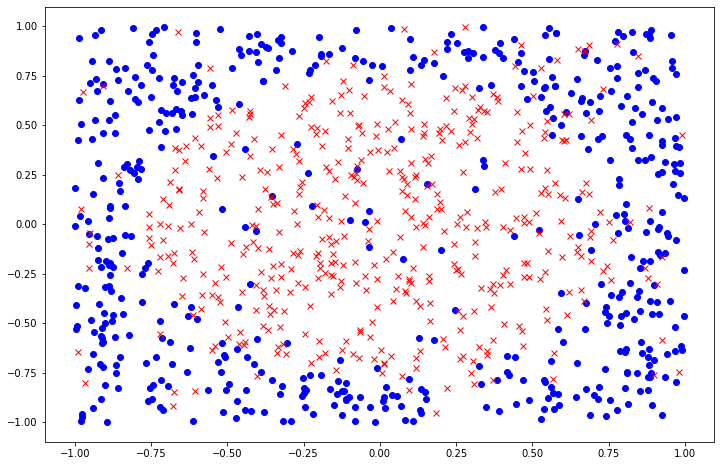

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(X[y==1][:, 0], X[y==1][:, 1], color='blue', marker='o', linestyle='None', label='+1')
ax.plot(X[y==-1][:, 0], X[y==-1][:, 1], color='red', marker='x', linestyle='None', label='-1'); 

In [12]:
def lin(X, y):
    """
    Args:
        X: ndarray of shape = [N, d]
        y: ndarray of shape = [N, ]    
    Returns:
        w: ndarray of shape = [d, ]
    """
    N = X.shape[0]
    X = np.c_[np.ones((N, 1)), X]
    w = pinv(X.T @ X) @ X.T @ y
    return w

In [13]:
w_lin = lin(X, y)
w_lin

array([ 0.06586025,  0.02371489, -0.01288701])

In [14]:
def calc_err(X, y, w):
    """
    Args:
        X: ndarray of shape = [N, d]
        y: ndarray of shape = [N, ] 
        w: ndarray of shape = [d, ]
    Returns:
        err: float
    """
    N = X.shape[0]
    X = np.c_[np.ones((N, 1)), X]
    
    y_hat = np.sign(X @ w)
    err = np.mean(y_hat != y)
    return err

In [15]:
calc_err(X, y, w_lin)

0.467

In [16]:
def simulation_lin_no_trans(N):
    err_list = []
    for _ in range(1000):    
        X, y = generate_data(N)    
        w_lin = lin(X, y)
        err = calc_err(X, y, w_lin)
        err_list.append(err)
    avg_err = np.mean(err_list)
    return avg_err

In [17]:
simulation_lin_no_trans(N=1000)

0.508207

**Question 14**
Now, transform the training data into the following nonlinear feature vector:
   
$$
\left(1, x_{1}, x_{2}, x_{1} x_{2}, x_{1}^{2}, x_{2}^{2}\right)
$$

Find the vector $\tilde{\mathbf{w}}$ that corresponds to the solution of linear regression, and take it for classification.

Which of the following hypotheses is closest to the one you find using linear regression on the transformed input? Closest here means agrees the most with your hypothesis (has the most probability of agreeing on a randomly selected point).

\begin{aligned}
&g\left(x_{1}, x_{2}\right)=\operatorname{sign}\left(-1-1.5 x_{1}+0.08 x_{2}+0.13 x_{1} x_{2}+0.05 x_{1}^{2}+1.5 x_{2}^{2}\right)\\
&g\left(x_{1}, x_{2}\right)=\operatorname{sign}\left(-1-1.5 x_{1}+0.08 x_{2}+0.13 x_{1} x_{2}+0.05 x_{1}^{2}+0.05 x_{2}^{2}\right)\\
&g\left(x_{1}, x_{2}\right)=\operatorname{sign}\left(-1-0.05 x_{1}+0.08 x_{2}+0.13 x_{1} x_{2}+1.5 x_{1}^{2}+1.5 x_{2}^{2}\right)\\
&g\left(x_{1}, x_{2}\right)=\operatorname{sign}\left(-1-0.05 x_{1}+0.08 x_{2}+0.13 x_{1} x_{2}+1.5 x_{1}^{2}+15 x_{2}^{2}\right)\\
&g\left(x_{1}, x_{2}\right)=\operatorname{sign}\left(-1-0.05 x_{1}+0.08 x_{2}+0.13 x_{1} x_{2}+15 x_{1}^{2}+1.5 x_{2}^{2}\right)
\end{aligned}

In [18]:
# def quadratic(x1, x2):
#     return np.array([x1, x2, x1 * x2, x1 ** 2, x2 ** 2])

def transform_X(X):
    """
    Args:
        X: ndarray of shape = [N, d]
    Returns:
        Z: ndarray of shape = [N, d]
    """
    N = X.shape[0]
    d = 5
    Z = np.zeros((N, d))
    Z[:, :2] = X[:]
    Z[:, 2] = X[:, 0] * X[:, 1]
    Z[:, 3] = X[:, 0] ** 2
    Z[:, 4] = X[:, 1] ** 2
    
    # Below does not take advantage of the numpy vectorized operation and is slow
#     i = 0
#     for x in X:
#         Z[i] = quadratic(*x)
#         i += 1    
    return Z
    



In [19]:
X, y = generate_data(N)  
Z = transform_X(X)
w_lin = lin(Z, y)
w_lin

array([-0.9914943 , -0.07906799,  0.1171203 , -0.02982396,  1.53896951,
        1.62686342])

So the closest hypothesis in the given hypotheses is

$$
g\left(x_{1}, x_{2}\right)=\operatorname{sign}\left(-1-0.05 x_{1}+0.08 x_{2}+0.13 x_{1} x_{2}+1.5 x_{1}^{2}+1.5 x_{2}^{2}\right).
$$

We can also run the simulation with the transformed data to see the classification error drops dramatically:

In [20]:
def simulation_lin_with_trans(N):
    err_list = []
    for _ in range(1000):    
        X, y = generate_data(N)  
        Z = transform_X(X)
        w_lin = lin(Z, y)
        err = calc_err(Z, y, w_lin)
        err_list.append(err)
    avg_err = np.mean(err_list)
    return avg_err

In [21]:
simulation_lin_with_trans(N=1000)

0.124313

**Question 15**

What is the closest value to the classification out-of-sample error $E_{\text{out}}$ of your hypothesis? Estimate it by generating a new set of 1000 points and adding noise as before. Average over 1000 runs to reduce the variation in your results.

In [22]:
def test_lin(N):
    err_list = []
    for _ in range(1000):    
        X, y = generate_data(N)  
        Z = transform_X(X)
        w_lin = lin(Z, y)
        
        X_test, y_test = generate_data(N)
        Z_test = transform_X(X_test)
        # Calculate E_out
        err = calc_err(Z_test, y_test, w_lin)
        err_list.append(err)
    avg_err = np.mean(err_list)
    return avg_err

In [23]:
test_lin(N=1000)

0.126341

**Question 16**

For Question 16-17, you will derive an algorithm for multinomial (multiclass) logistic regression. For a $K$-class classification problem, we will denote the output space $\mathcal{Y}=\{1,2, \cdots, K\}$. The hypotheses considered by MLR are indexed by a list of weight vectors $\left(\mathbf{w}_{1}, \cdots, \mathbf{w}_{K}\right)$, each weight vector of length $d+1$. Each list represents a hypothesis

$$
h_{y}(\mathbf{x})=\frac{\exp \left(\mathbf{w}_{y}^{T} \mathbf{x}\right)}{\sum_{i=1}^{K} \exp \left(\mathbf{w}_{i}^{T} \mathbf{x}\right)}
$$

that can be used to approximate the target distribution $P(y | \mathbf{x})$. MLR then seeks for the maximum likelihood solution over all such hypotheses.

For general $K$, derive an $E_{\mathrm{in}}\left(\mathbf{w}_{1}, \cdots, \mathbf{w}_{K}\right)$ like page 11 of Lecture 10 slides by minimizing the negative log likelihood.

**Sol:**

The likelihood function of multinomial logistic hypothesis is 

$$
L(\mathbf{w}_1, \cdots, \mathbf{w}_K) = \prod_{n=1}^{N} f(\mathbf{x}_n, y_n) = \prod_{n=1}^{N} P(y_n | \mathbf{x}_n) P(\mathbf{x}_n) = \prod_{n=1}^{N} h_{y_n}( \mathbf{x}_n) P(\mathbf{x}_n).
$$

So the log likelihood is

$$
\log L(\mathbf{w}_1, \cdots, \mathbf{w}_K) = \sum_{n=1}^N \left[\log h_{y_n}( \mathbf{x}_n) + \log P(\mathbf{x}_n)\right],
$$

and maximizing log likelihood is equivalent to minimize its negative, i.e.,

$$
\max_{\mathbf{w}_1, \cdots, \mathbf{w}_K}  \log L \iff \min_{\mathbf{w}_1, \cdots, \mathbf{w}_K} -\sum_{n=1}^N \left[\log h_{y_n}( \mathbf{x}_n) + \log P(\mathbf{x}_n)\right].
$$

Since the second term $\log P(\mathbf{x}_n)$ does not depend on $\mathbf{w}_1, \cdots, \mathbf{w}_K$, we can simply ignore it. Then 

\begin{align}
\max_{\mathbf{w}_1, \cdots, \mathbf{w}_K}  \log L &\iff
\min_{\mathbf{w}_1, \cdots, \mathbf{w}_K} -\sum_{n=1}^N \log h_{y_n}( \mathbf{x}_n) \\
&\iff \min_{\mathbf{w}_1, \cdots, \mathbf{w}_K} \sum_{n=1}^N \left[ \log\left(\sum_{i=1}^{K} \exp \left(\mathbf{w}_{i}^{T} \mathbf{x}_n \right) \right) -\mathbf{w}^T_{y_n} \mathbf{x}_n \right]  \\
&\iff \min_{\mathbf{w}_1, \cdots, \mathbf{w}_K} \frac{1}{N} \sum_{n=1}^N \left[ \log\left(\sum_{i=1}^{K} \exp \left(\mathbf{w}_{i}^{T} \mathbf{x}_n \right) \right) -\mathbf{w}^T_{y_n} \mathbf{x}_n \right] 
\end{align}


Therefore, the error function we want to minimize is 

$$
E_{\mathrm{in}}\left(\mathbf{w}_{1}, \cdots, \mathbf{w}_{K}\right) = \frac{1}{N} \sum_{n=1}^N \left[ \log\left(\sum_{i=1}^{K} \exp \left(\mathbf{w}_{i}^{T} \mathbf{x}_n \right) \right) -\mathbf{w}^T_{y_n} \mathbf{x}_n \right] 
$$

**Question 17**

For the $E_{\text{in}}$ derived above, its gradient $\nabla E_{\mathrm{in}}$ can be represented by $\left(\frac{\partial E_{\text {in }}}{\partial \mathbf{w}_{1}}, \frac{\partial E_{\text {in }}}{\partial \mathbf{w}_{2}}, \cdots, \frac{\partial E_{\text {in }}}{\partial \mathbf{w}_K}\right)$, write down $\frac{\partial E_{\text {in }}}{\partial \mathbf{w}_k}$.

**Sol:**

Take the derivative with respect to $\mathbf{w}_k$, we can obtain

\begin{align}
\frac{\partial E_{\text {in }}}{\partial \mathbf{w}_k} &= \frac{1}{N} \sum_{n=1}^N \left[\frac{\exp (\mathbf{w}_k^T \mathbf{x}_n) \mathbf{x}_n}{\sum_{i=1}^{K} \exp \left(\mathbf{w}_{i}^{T} \mathbf{x}_n \right)} - [y_n = k] \mathbf{x}_n  \right] \\
&= \frac{1}{N} \sum_{n=1}^N \left[\left(h_{k}(\mathbf{x}_n) - [y_n = k]\right) \mathbf{x}_n \right]
\end{align}

**Question 18**

For Question 18-20, you will play with logistic regression.

Please use the following set `hw3_train.dat` for training and the following set `hw3_test.dat` for testing.

Implement the fixed learning rate gradient descent algorithm for logistic regression. Run the algorithm with $\eta = 0.001$ and $T = 2000$. What is $E_{\text{out}}(g)$ from your algorithm, evaluated using the 0/1 error on the test set?

In [24]:
def sigmoid(s):
    return 1 / (1 + np.exp(-s))

In [25]:
def calc_grad_err(X, y, w):
    """
    Args:
        X: ndarray of shape = [N, d + 1]
        y: ndarray of shape = [N, 1]
        w: ndarray of shape = [d + 1, 1]
    returns:
        grad: ndarray of shape = [d + 1, 1]
    """
    N = X.shape[0]
    grad = (X * (-y)).T @ sigmoid(X @ w * (-y)) / N
    return grad

In [26]:
def lr(X, y, eta):
    """
    Args:
        X: ndarray of shape = [N, d]
        y: ndarray of shape = [N, ]
        eta: float
    Returns:
        wt: ndarray of shape = [d + 1, ]
    """
    N, d = X.shape
    X = np.c_[np.ones((N, 1)), X]
#     wt = np.random.normal(size=(d+1, 1))  # initialize using normal distribution requires more steps to converge in this example
    wt = np.zeros((d + 1, 1))               # initialize all parameters to zero converges more quickly
    y = y.reshape(-1, 1)                    # reshape y to a two dimensional ndarray to make `calc_grad_err` function easy to implement
     
    T = 2000
    for t in range(T):
        grad_t = calc_grad_err(X, y, wt)
        wt -= eta * grad_t

    wt = wt.flatten()
    return wt
    

In [27]:
def calc_zero_one_err(X, y, w):
    """
    Args:
        X: ndarray of shape = [N, d]
        y: ndarray of shape = [N, ]
        w: ndarray of shape = [d + 1, ]
    Returns:
        avg_err: float
    """
    N = X.shape[0]
    X = np.c_[np.ones((N, 1)), X]
    y_hat = np.sign(X @ w)  # h(x) > 1/2 <==> w^T x > 0
    avg_err = np.mean(y_hat != y)
    return avg_err

In [28]:
import pandas as pd

In [29]:
# Read in training and test data
df_train = pd.read_csv('hw3_train.dat', header=None, sep='\s+')
X_train_df, y_train_df = df_train.iloc[:, :-1], df_train.iloc[:, -1]
X_train, y_train = X_train_df.to_numpy(), y_train_df.to_numpy()

df_test = pd.read_csv('hw3_test.dat', header=None, sep='\s+')
X_test_df, y_test_df = df_test.iloc[:, :-1], df_test.iloc[:, -1]
X_test, y_test = X_test_df.to_numpy(), y_test_df.to_numpy()

In [30]:
eta = 0.001
w_lr = lr(X_train, y_train, eta)

In [31]:
# E_in
calc_zero_one_err(X_train, y_train, w_lr)

0.466

In [32]:
# E_out
calc_zero_one_err(X_test, y_test, w_lr)

0.475

**Question 19**

Implement the fixed learning rate gradient descent algorithm for logistic regression. Run the algorithm with $\eta = 0.01$ and $T = 2000$, what is $E_{\text{out}}(g)$ from your algorithm, evaluated using the 0/1 error on the test set?

In [33]:
eta = 0.01
w_lr = lr(X_train, y_train, eta)

In [34]:
# E_in
calc_zero_one_err(X_train, y_train, w_lr)

0.197

In [35]:
# E_out
calc_zero_one_err(X_test, y_test, w_lr)

0.22

**Question 20**

Implement the fixed learning rate stochastic gradient descent algorithm for logistic regression. Instead of randomly choosing $n$ in each iteration, please simply pick the example with the cyclic order $n = 1, 2, \cdots, N, 1, 2, \cdots$

Run the algorithm with $\eta = 0.001$ and $T = 2000$, what is $E_{\text{out}}(g)$ from your algorithm, evaluated using the 0/1 error on the test set?

In [36]:
def lr_sgd(X, y, eta):
    """
    Args:
        X: ndarray of shape = [N, d]
        y: ndarray of shape = [N, ]
        eta: float
    Returns:
        wt: ndarray of shape = [d + 1, ]
    """
    N, d = X.shape
    X = np.c_[np.ones((N, 1)), X]
    wt = np.zeros((d + 1, 1))               
    y = y.reshape(-1, 1)                    
     
    T = 2000
    n = 0
    for t in range(T):
        xt, yt = X[n].reshape(-1, 1).T, y[n]
        grad_t = calc_grad_err(xt, yt, wt)
        wt -= eta * grad_t
        n = n + 1 if n != N - 1 else 0

    wt = wt.flatten()
    return wt
    

In [37]:
eta = 0.001
w_lr = lr_sgd(X_train, y_train, eta)

In [38]:
# E_in
calc_zero_one_err(X_train, y_train, w_lr)

0.464

In [39]:
# E_out
calc_zero_one_err(X_test, y_test, w_lr)

0.473

So for this data set, we need more iterations for SGD to converge.